Урок 2. Keras

In [47]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
x_train = x_train/256
x_test = x_test/256

In [4]:
x_train = x_train.reshape((-1, 28*28))
x_test = x_test.reshape((-1, 28*28))

In [5]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(28*28, )))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
plot_model(model, to_file='model.png')

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [12]:
model.fit(x_train, to_categorical(y_train), epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.8153 - accuracy: 0.7432 - val_loss: 0.5838 - val_accuracy: 0.8054
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5448 - accuracy: 0.8156 - val_loss: 0.5091 - val_accuracy: 0.8270
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4919 - accuracy: 0.8318 - val_loss: 0.4964 - val_accuracy: 0.8183
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4641 - accuracy: 0.8404 - val_loss: 0.4625 - val_accuracy: 0.8392
Epoch 5/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4443 - accuracy: 0.8468 - val_loss: 0.4494 - val_accuracy: 0.8412


In [56]:
result1 = model.evaluate(x_test, to_categorical(y_test))
result1

313/313 [==============================] - 0s 781us/step - loss: 0.4744 - accuracy: 0.8334


[0.4744250476360321, 0.8334000110626221]

In [16]:
preds = model.predict(x_test)

In [55]:
# Для первой картинки из теста класс = 9
print(np.argmax(preds, axis=1)[0])

9


In [42]:
image = x_test[0]
image

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

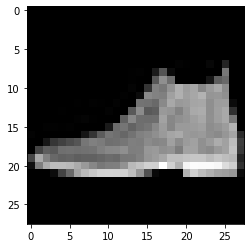

In [46]:
image = np.reshape(image, (28, 28))
plt.imshow(image, cmap='gray')

In [48]:
f_mnist = pd.DataFrame(('T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'))

In [51]:
f_mnist.columns = ('Description',)
f_mnist

,Description
0,T-shirt/top
1,Trouser
2,Pullover
3,Dress
4,Coat
5,Sandal
6,Shirt
7,Sneaker
8,Bag
9,Ankle boot


In [52]:
# 9 = Ankle boot - угадало

In [69]:
# Это была первая модель - самая простая. Попробуем ту-же топологию, но с разным количеством параметров
results = []
for units in [32, 64, 128, 256, 512, 1024]:
    model = Sequential()
    model.add(Dense(units=units, activation='relu', input_shape=(28*28, )))
    model.add(Dense(units=10, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
    model.fit(x_train, to_categorical(y_train), epochs=5, batch_size=32, validation_split=0.2)
    results.append(model.evaluate(x_test, to_categorical(y_test)))

Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.8529 - accuracy: 0.7168 - val_loss: 0.6067 - val_accuracy: 0.7900
Epoch 2/5
1500/1500 [==============================] - 1s 963us/step - loss: 0.5562 - accuracy: 0.8127 - val_loss: 0.5230 - val_accuracy: 0.8205
Epoch 3/5
1500/1500 [==============================] - 1s 891us/step - loss: 0.5004 - accuracy: 0.8281 - val_loss: 0.4857 - val_accuracy: 0.8314
Epoch 4/5
1500/1500 [==============================] - 1s 877us/step - loss: 0.4711 - accuracy: 0.8372 - val_loss: 0.4672 - val_accuracy: 0.8395
Epoch 5/5
313/313 [==============================] - 0s 867us/step - loss: 0.4739 - accuracy: 0.8329
Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.8220 - accuracy: 0.7346 - val_loss: 0.5990 - val_accuracy: 0.7925
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5494 - accuracy: 0.8151 - val_loss: 0.5194 - val_accuracy: 0.8217
Epoch 3/5
1500/1500 [==============

In [70]:
results

[[0.4738989770412445, 0.8328999876976013],
 [0.4915260374546051, 0.8259999752044678],
 [0.46793627738952637, 0.8374999761581421],
 [0.4574931561946869, 0.8395000100135803],
 [0.44765058159828186, 0.8427000045776367],
 [0.4470403790473938, 0.843500018119812]]

In [71]:
res = np.array(results)

In [72]:
res[:, 0] = [32, 64, 128, 256, 512, 1024]

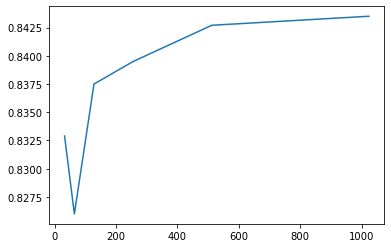

In [73]:
# Зависимость accuracy от количества нейронов в нашем единственном (он-же входной) слое
plt.plot(res[:, 0], res[:, 1])

In [74]:
# Пока-что выходит чем больше - тем лучше ))

In [76]:
# Попробуем увеличить количество слоев
results = []
for layers in [0, 1, 2, 3, 4, 5]:
    model = Sequential()
    model.add(Dense(units=512, activation='relu', input_shape=(28*28, )))
    for layer in range(layers):
        model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=10, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
    model.fit(x_train, to_categorical(y_train), epochs=5, batch_size=32, validation_split=0.2)
    results.append(model.evaluate(x_test, to_categorical(y_test)))

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7508 - accuracy: 0.7642 - val_loss: 0.5539 - val_accuracy: 0.8162
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5162 - accuracy: 0.8270 - val_loss: 0.4992 - val_accuracy: 0.8241
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4692 - accuracy: 0.8416 - val_loss: 0.4682 - val_accuracy: 0.8349
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4426 - accuracy: 0.8495 - val_loss: 0.4474 - val_accuracy: 0.8431
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.4455 - accuracy: 0.8448
Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.7303 - accuracy: 0.7628 - val_loss: 0.5217 - val_accuracy: 0.8205
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4913 - accuracy: 0.8311 - val_loss: 0.4613 - val_accuracy: 0.8394
Epoch 3/5
1500/1500 [======================

In [80]:
res = np.array(results)
res[:, 0] = [0, 1, 2, 3, 4, 5]

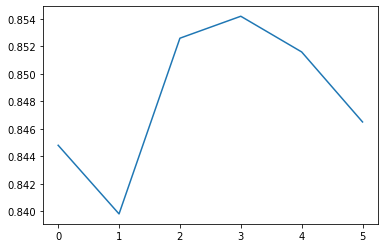

In [81]:
# Зависимость accuracy от количества скрытых слоев
plt.plot(res[:, 0], res[:, 1])

In [82]:
# Тут уже интереснее. 3 скрытых слоя наилучший результат

In [89]:
# Зависимость от количества эпох
model = Sequential()
model.add(Dense(units=512, activation='relu', input_shape=(28*28, )))
for layer in range(3):
    model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
hh = model.fit(x_train, to_categorical(y_train), epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.8115 - accuracy: 0.7205 - val_loss: 0.5366 - val_accuracy: 0.8126
Epoch 2/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4958 - accuracy: 0.8248 - val_loss: 0.5034 - val_accuracy: 0.8196
Epoch 3/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4381 - accuracy: 0.8454 - val_loss: 0.4378 - val_accuracy: 0.8486
Epoch 4/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4010 - accuracy: 0.8569 - val_loss: 0.3995 - val_accuracy: 0.8560
Epoch 5/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3775 - accuracy: 0.8651 - val_loss: 0.3825 - val_accuracy: 0.8661
Epoch 6/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3584 - accuracy: 0.8716 - val_loss: 0.3809 - val_accuracy: 0.8644
Epoch 7/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3422 - accuracy: 0.8764 - val_loss: 0.3569 - val_accuracy:

In [90]:
hh.history

{'loss': [0.8114560842514038,
  0.49575141072273254,
  0.4381198287010193,
  0.4009966552257538,
  0.37745311856269836,
  0.3584229648113251,
  0.3422306180000305,
  0.33012616634368896,
  0.3181227743625641,
  0.305269330739975,
  0.29675641655921936,
  0.2868412137031555,
  0.27932843565940857,
  0.2699536383152008,
  0.26141357421875,
  0.2538449764251709,
  0.2480587363243103,
  0.24003836512565613,
  0.23384229838848114,
  0.2276853770017624,
  0.22173477709293365,
  0.21443448960781097,
  0.2121080905199051,
  0.20533078908920288,
  0.19960813224315643,
  0.1930762678384781,
  0.18889544904232025,
  0.1844394952058792,
  0.180802121758461,
  0.1744181513786316,
  0.1722891479730606,
  0.16481128334999084,
  0.16105282306671143,
  0.15915636718273163,
  0.15388275682926178,
  0.1492518037557602,
  0.1476379930973053,
  0.14108632504940033,
  0.13970018923282623,
  0.13382494449615479,
  0.12999948859214783,
  0.127999946475029,
  0.12356232851743698,
  0.12110044062137604,
  0.119

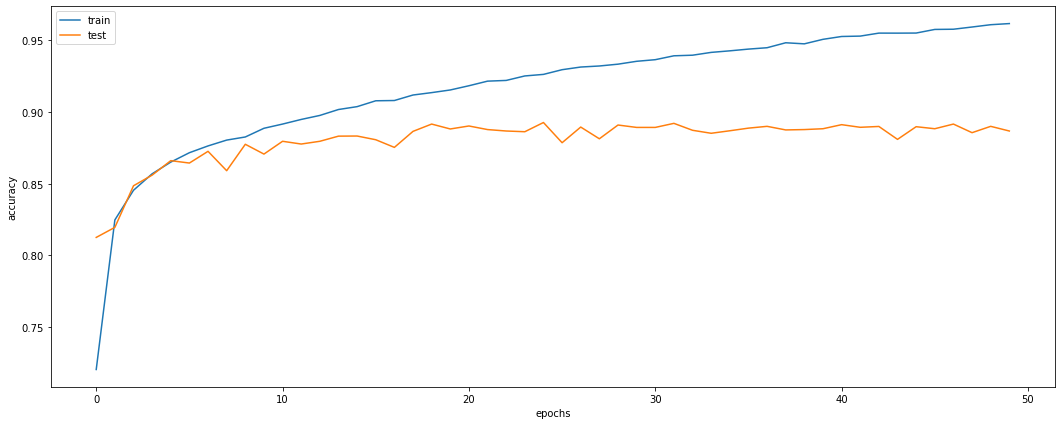

In [96]:
plt.figure(figsize=(18,7))
plt.plot(range(50), hh.history['accuracy'])
plt.plot(range(50), hh.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(('train', 'test'))
plt.draw()

In [97]:
# На тесте растет до бесконечности - спасибо переобучению
# На трейне все не так радужно - после 15-20 эпох особо не растет

In [98]:
# Еще кстати была мысль не просто нормализовать входные данные а сделать их zero-centered
(zx_train, zy_train), (zx_test, zy_test) = tf.keras.datasets.fashion_mnist.load_data()
zx_train = zx_train/128 - 0.5
zx_test = zx_test/128 - 0.5
zx_train = x_train.reshape((-1, 28*28))
zx_test = x_test.reshape((-1, 28*28))

In [99]:
# Зависимость от количества эпох с центрированными данными
model = Sequential()
model.add(Dense(units=512, activation='relu', input_shape=(28*28, )))
for layer in range(3):
    model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
zhh = model.fit(zx_train, to_categorical(zy_train), epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.8759 - accuracy: 0.7003 - val_loss: 0.5468 - val_accuracy: 0.8083
Epoch 2/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4916 - accuracy: 0.8271 - val_loss: 0.4657 - val_accuracy: 0.8403
Epoch 3/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4352 - accuracy: 0.8460 - val_loss: 0.4297 - val_accuracy: 0.8487
Epoch 4/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4030 - accuracy: 0.8555 - val_loss: 0.4156 - val_accuracy: 0.8519
Epoch 5/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3791 - accuracy: 0.8644 - val_loss: 0.4116 - val_accuracy: 0.8537
Epoch 6/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3615 - accuracy: 0.8707 - val_loss: 0.3849 - val_accuracy: 0.8621
Epoch 7/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3444 - accuracy: 0.8750 - val_loss: 0.3895 - val_accuracy:

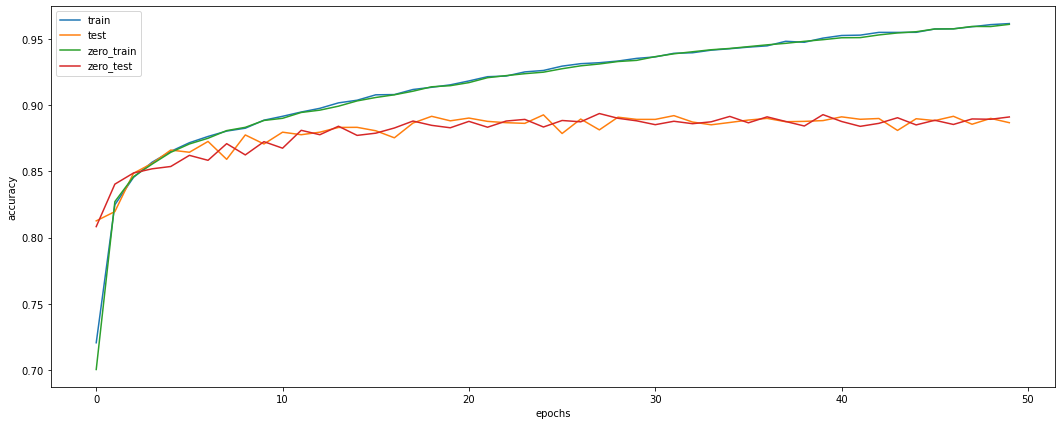

In [100]:
plt.figure(figsize=(18,7))
plt.plot(range(50), hh.history['accuracy'])
plt.plot(range(50), hh.history['val_accuracy'])
plt.plot(range(50), zhh.history['accuracy'])
plt.plot(range(50), zhh.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(('train', 'test', 'zero_train', 'zero_test'))
plt.draw()

In [101]:
# Никакой значимой разницы

In [102]:
# Попробую разные активационные функции..
model = Sequential()
model.add(Dense(units=512, activation='tanh', input_shape=(28*28, )))
for layer in range(3):
    model.add(Dense(units=64, activation='tanh'))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
thh = model.fit(x_train, to_categorical(y_train), epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5102 - accuracy: 0.8168 - val_loss: 0.4440 - val_accuracy: 0.8385
Epoch 2/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4081 - accuracy: 0.8507 - val_loss: 0.3954 - val_accuracy: 0.8569
Epoch 3/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3756 - accuracy: 0.8625 - val_loss: 0.3760 - val_accuracy: 0.8637
Epoch 4/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3597 - accuracy: 0.8683 - val_loss: 0.3711 - val_accuracy: 0.8665
Epoch 5/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3449 - accuracy: 0.8741 - val_loss: 0.3591 - val_accuracy: 0.8698
Epoch 6/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3276 - accuracy: 0.8786 - val_loss: 0.3504 - val_accuracy: 0.8745
Epoch 7/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3229 - accuracy: 0.8811 - val_loss: 0.3571 - val_accuracy:

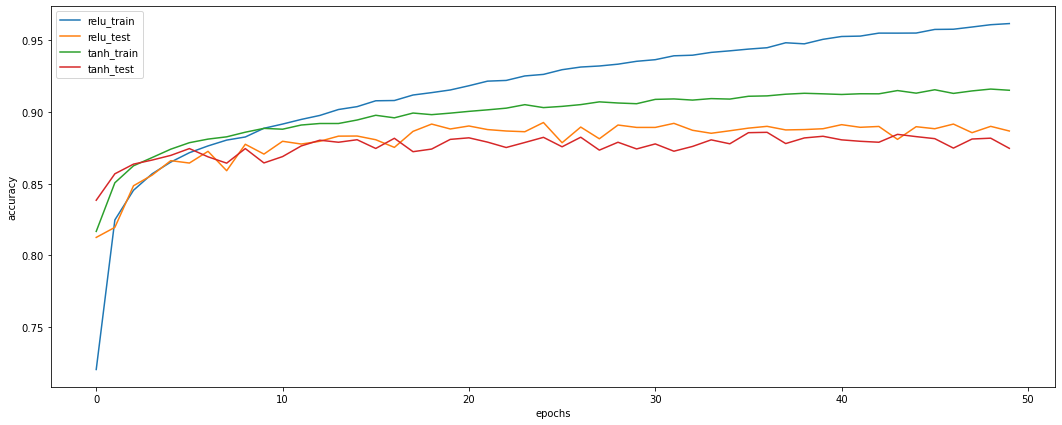

In [104]:
plt.figure(figsize=(18,7))
plt.plot(range(50), hh.history['accuracy'])
plt.plot(range(50), hh.history['val_accuracy'])
plt.plot(range(50), thh.history['accuracy'])
plt.plot(range(50), thh.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(('relu_train', 'relu_test', 'tanh_train', 'tanh_test'))
plt.draw()

In [105]:
# Так гораздо ниже переобучение на трейне - но скор на тесте получается сравнимым - ну может чуть ниже.

In [106]:
model = Sequential()
model.add(Dense(units=512, activation='relu', input_shape=(28*28, )))
for layer in range(3):
    model.add(Dense(units=64, activation='sigmoid'))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
shh = model.fit(x_train, to_categorical(y_train), epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.7803 - accuracy: 0.7463 - val_loss: 0.4425 - val_accuracy: 0.8482
Epoch 2/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3984 - accuracy: 0.8603 - val_loss: 0.4069 - val_accuracy: 0.8559
Epoch 3/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3445 - accuracy: 0.8765 - val_loss: 0.3824 - val_accuracy: 0.8637
Epoch 4/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3138 - accuracy: 0.8854 - val_loss: 0.3352 - val_accuracy: 0.8782
Epoch 5/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2933 - accuracy: 0.8921 - val_loss: 0.3357 - val_accuracy: 0.8798
Epoch 6/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2769 - accuracy: 0.8996 - val_loss: 0.3389 - val_accuracy: 0.8795
Epoch 7/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2643 - accuracy: 0.9039 - val_loss: 0.3301 - val_accuracy:

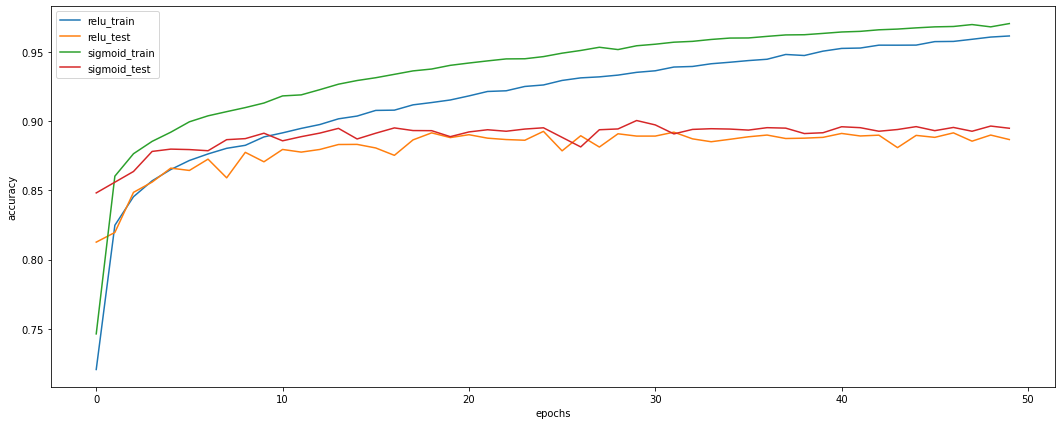

In [107]:
plt.figure(figsize=(18,7))
plt.plot(range(50), hh.history['accuracy'])
plt.plot(range(50), hh.history['val_accuracy'])
plt.plot(range(50), shh.history['accuracy'])
plt.plot(range(50), shh.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(('relu_train', 'relu_test', 'sigmoid_train', 'sigmoid_test'))
plt.draw()

In [109]:
# C сигмоидом чууть-чуть получше (некритично) тест. И видимо быстрее происходит переобучение на трейне, чем с relu